In [1]:
#Import modules
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import requests
import json
import os

In [2]:
#Source - https://covidtracking.com/data
#https://github.com/CSSEGISandData/COVID-19/tree/master/csse_covid_19_data used to verify accuracy 

#Get Covid data for all of U.S.
json_url = "https://api.covidtracking.com/v1/states/daily.json"

#Create dictionary to read from
us_daily_dict = requests.get(json_url).json()

In [3]:
#Create data frame from dictionary
us_daily = pd.DataFrame(us_daily_dict)

# Filter Kansas and New Jersey

In [4]:
#Filter Kansas and New Jersey
ks_nj_daily = pd.DataFrame(us_daily[["date", "state", "positive", "negative", "positiveIncrease", "negativeIncrease", "death", "deathIncrease", 
                  "totalTestResultsIncrease", "totalTestResults", "recovered"]])
ks_nj_daily = ks_nj_daily.loc[(ks_nj_daily["state"] == "KS") | (ks_nj_daily["state"] == "NJ") ]

In [5]:
#Add percentage column
ks_nj_daily["Percentage"] = ks_nj_daily["positiveIncrease"]/ks_nj_daily["totalTestResultsIncrease"]

#Fill NaN fields to be zero for readability
ks_nj_daily[["Percentage", "death", "recovered", "positive", "negative"]] = ks_nj_daily[["Percentage", "death", "recovered", "positive", "negative"]].fillna(0)

#Add active cases column
ks_nj_daily["Active Cases"] = ks_nj_daily["positive"] - (ks_nj_daily["recovered"] + ks_nj_daily["death"])

#Format percentage    
ks_nj_daily["Percentage"] = ks_nj_daily["Percentage"].astype(float).map("{:.2%}".format)

#Format date
ks_nj_daily["date"] = pd.to_datetime(ks_nj_daily["date"], format='%Y%m%d')

#Write to csv file
ks_nj_daily.to_csv('Resources/ks_nj_daily.csv')

# Filter and Separate Kansas & New Jersey by Month for Plotting

In [6]:
#Filter for March data
ks_march = ks_nj_daily.loc[(ks_nj_daily["date"] >= "2020-03-01") & (ks_nj_daily["date"] <= "2020-03-31") & (ks_nj_daily["state"] == "KS") ,:]
nj_march = ks_nj_daily.loc[(ks_nj_daily["date"] >= "2020-03-01") & (ks_nj_daily["date"] <= "2020-03-31") & (ks_nj_daily["state"] == "NJ") ,:]
nj_march = nj_march.loc[(nj_march["positive"] > 0),:]

#Sort values for charting
ks_march = ks_march.sort_values("date", ascending = True)
nj_march = nj_march.sort_values("date", ascending = True)

#Filter April data
ks_april = ks_nj_daily.loc[(ks_nj_daily["date"] >= "2020-04-01") & (ks_nj_daily["date"] <= "2020-04-30") & (ks_nj_daily["state"] == "KS") ,:]
nj_april = ks_nj_daily.loc[(ks_nj_daily["date"] >= "2020-04-01") & (ks_nj_daily["date"] <= "2020-04-30") & (ks_nj_daily["state"] == "NJ"),:]

#Sort values for charting
ks_april = ks_april.sort_values("date", ascending = True)
nj_april = nj_april.sort_values("date", ascending = True)

#Filter May data
ks_may = ks_nj_daily.loc[(ks_nj_daily["date"] >= "2020-05-01") & (ks_nj_daily["date"] <= "2020-05-31") & (ks_nj_daily["state"] == "KS") ,:]
nj_may = ks_nj_daily.loc[(ks_nj_daily["date"] >= "2020-05-01") & (ks_nj_daily["date"] <= "2020-05-31") & (ks_nj_daily["state"] == "NJ"),:]

#Sort values for charting
ks_may = ks_may.sort_values("date", ascending = True)
nj_may = nj_may.sort_values("date", ascending = True)

#Filter June data
ks_june = ks_nj_daily.loc[(ks_nj_daily["date"] >= "2020-06-01") & (ks_nj_daily["date"] <= "2020-06-30") & (ks_nj_daily["state"] == "KS") ,:]
nj_june = ks_nj_daily.loc[(ks_nj_daily["date"] >= "2020-06-01") & (ks_nj_daily["date"] <= "2020-06-30") & (ks_nj_daily["state"] == "NJ"),:]

#Sort values for charting
ks_june = ks_june.sort_values("date", ascending = True)
nj_june = nj_june.sort_values("date", ascending = True)

#Filter July data
ks_july = ks_nj_daily.loc[(ks_nj_daily["date"] >= "2020-07-01") & (ks_nj_daily["date"] <= "2020-07-31") & (ks_nj_daily["state"] == "KS") ,:]
nj_july = ks_nj_daily.loc[(ks_nj_daily["date"] >= "2020-07-01") & (ks_nj_daily["date"] <= "2020-07-31") & (ks_nj_daily["state"] == "NJ"),:]

#Sort values for charting
ks_july = ks_july.sort_values("date", ascending = True)
nj_july = nj_july.sort_values("date", ascending = True)

#Filter August data
ks_aug = ks_nj_daily.loc[(ks_nj_daily["date"] >= "2020-08-01") & (ks_nj_daily["date"] <= "2020-08-31") & (ks_nj_daily["state"] == "KS") ,:]
nj_aug = ks_nj_daily.loc[(ks_nj_daily["date"] >= "2020-08-01") & (ks_nj_daily["date"] <= "2020-08-31") & (ks_nj_daily["state"] == "NJ"),:]

#Sort values for charting
ks_aug = ks_aug.sort_values("date", ascending = True)
nj_aug = nj_aug.sort_values("date", ascending = True)

# Plot Cumulative Case Total by Month for Kansas

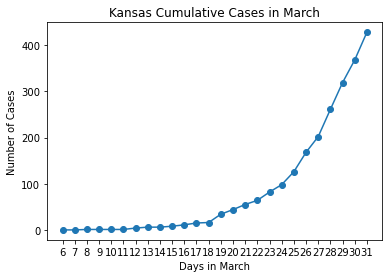

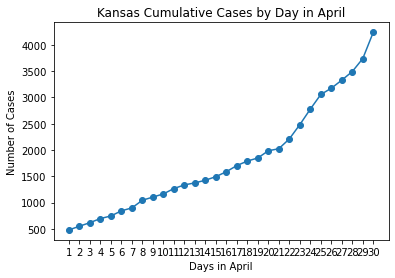

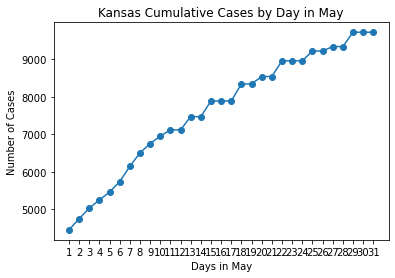

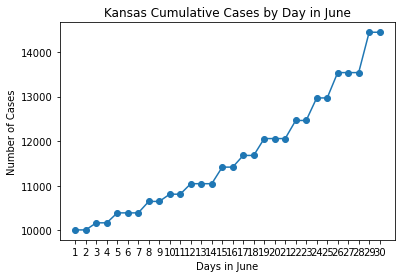

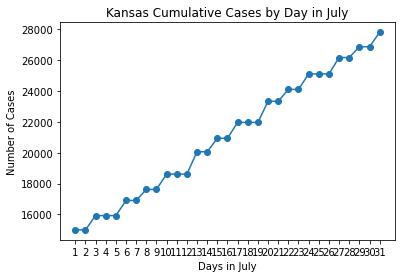

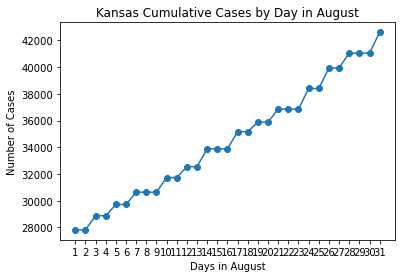

In [7]:
#Plot March data for Kansas
march_ks = plt.figure(1)
ks_date = np.arange(6,32)
ks_march_cases = ks_march["positive"]

plt.plot(ks_date, ks_march_cases, marker = 'o')
plt.xticks(np.arange(min(ks_date), max(ks_date)+1, 1.0))
plt.xlabel("Days in March")
plt.ylabel("Number of Cases")
plt.title("Kansas Cumulative Cases in March")
plt.savefig("Images/Cumulative/ks_march_graph.png")

april_ks = plt.figure(2)
date = np.arange(1,31)
ks_april_cases = ks_april["positive"]

plt.plot(date, ks_april_cases, marker = 'o')
plt.xticks(np.arange(min(date), max(date)+1, 1.0))
plt.xlabel("Days in April")
plt.ylabel("Number of Cases")
plt.title("Kansas Cumulative Cases by Day in April")
plt.savefig("Images/Cumulative/ks_april_graph.png")

#Plot May data for Kansas   
may_ks = plt.figure(3)
date = np.arange(1,32)
ks_may_cases = ks_may["positive"]

plt.plot(date, ks_may_cases, marker = 'o')
plt.xticks(np.arange(min(date), max(date)+1, 1.0))
plt.xlabel("Days in May")
plt.ylabel("Number of Cases")
plt.title("Kansas Cumulative Cases by Day in May")  
plt.savefig("Images/Cumulative/ks_may_graph.png")

#Plot June data for Kansas   
june_ks = plt.figure(4)
date = np.arange(1,31)
ks_june_cases = ks_june["positive"]

plt.plot(date, ks_june_cases, marker = 'o')
plt.xticks(np.arange(min(date), max(date)+1, 1.0))
plt.xlabel("Days in June")
plt.ylabel("Number of Cases")
plt.title("Kansas Cumulative Cases by Day in June")  
plt.savefig("Images/Cumulative/ks_june_graph.png")

#Plot July data for Kansas   
july_ks = plt.figure(5)
date = np.arange(1,32)
ks_july_cases = ks_july["positive"]

plt.plot(date, ks_july_cases, marker = 'o')
plt.xticks(np.arange(min(date), max(date)+1, 1.0))
plt.xlabel("Days in July")
plt.ylabel("Number of Cases")
plt.title("Kansas Cumulative Cases by Day in July")  
plt.savefig("Images/Cumulative/ks_july_graph.png")

#Plot August data for Kansas   
aug_ks = plt.figure(6)
date = np.arange(1,32)
ks_aug_cases = ks_aug["positive"]

plt.plot(date, ks_aug_cases, marker = 'o')
plt.xticks(np.arange(min(date), max(date)+1, 1.0))
plt.xlabel("Days in August")
plt.ylabel("Number of Cases")
plt.title("Kansas Cumulative Cases by Day in August")  
plt.savefig("Images/Cumulative/ks_aug_graph.png")

plt.show()

# Plot Cumulative Case Total by Month for New Jersey

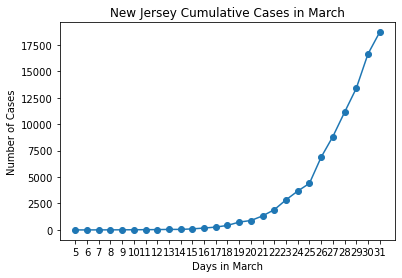

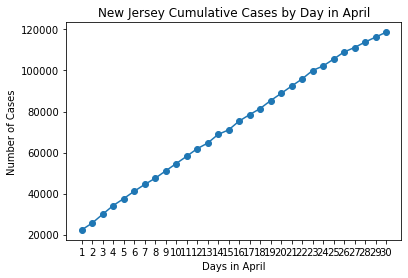

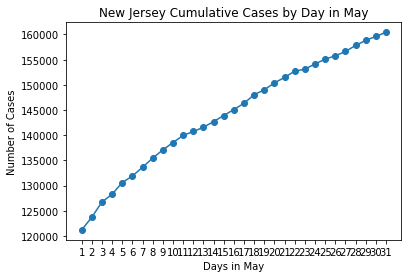

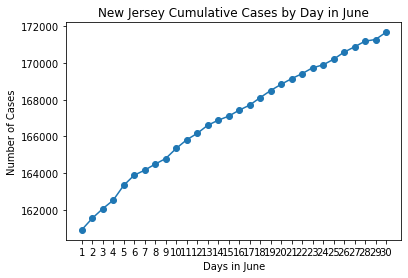

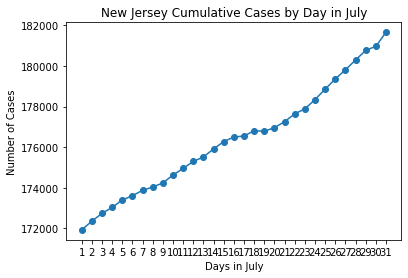

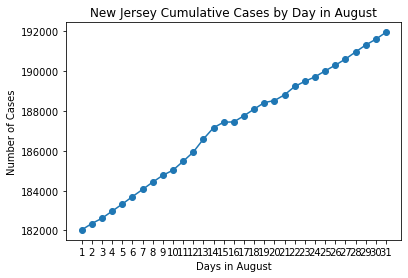

In [8]:
#Plot March data for Kansas
march_ks = plt.figure(1)
nj_date = np.arange(5,32)
nj_march_cases = nj_march["positive"]

plt.plot(nj_date, nj_march_cases, marker = 'o')
plt.xticks(np.arange(min(nj_date), max(nj_date)+1, 1.0))
plt.xlabel("Days in March")
plt.ylabel("Number of Cases")
plt.title("New Jersey Cumulative Cases in March")
plt.savefig("Images/Cumulative/nj_march_graph.png")

april_ks = plt.figure(2)
date = np.arange(1,31)
nj_april_cases = nj_april["positive"]

plt.plot(date, nj_april_cases, marker = 'o')
plt.xticks(np.arange(min(date), max(date)+1, 1.0))
plt.xlabel("Days in April")
plt.ylabel("Number of Cases")
plt.title("New Jersey Cumulative Cases by Day in April")
plt.savefig("Images/Cumulative/nj_april_graph.png")

#Plot May data for Kansas   
may_ks = plt.figure(3)
date = np.arange(1,32)
nj_may_cases = nj_may["positive"]

plt.plot(date, nj_may_cases, marker = 'o')
plt.xticks(np.arange(min(date), max(date)+1, 1.0))
plt.xlabel("Days in May")
plt.ylabel("Number of Cases")
plt.title("New Jersey Cumulative Cases by Day in May")  
plt.savefig("Images/Cumulative/nj_may_graph.png")

#Plot June data for Kansas   
june_ks = plt.figure(4)
date = np.arange(1,31)
nj_june_cases = nj_june["positive"]

plt.plot(date, nj_june_cases, marker = 'o')
plt.xticks(np.arange(min(date), max(date)+1, 1.0))
plt.xlabel("Days in June")
plt.ylabel("Number of Cases")
plt.title("New Jersey Cumulative Cases by Day in June")  
plt.savefig("Images/Cumulative/nj_june_graph.png")

#Plot July data for Kansas   
july_ks = plt.figure(5)
date = np.arange(1,32)
nj_july_cases = nj_july["positive"]

plt.plot(date, nj_july_cases, marker = 'o')
plt.xticks(np.arange(min(date), max(date)+1, 1.0))
plt.xlabel("Days in July")
plt.ylabel("Number of Cases")
plt.title("New Jersey Cumulative Cases by Day in July")  
plt.savefig("Images/Cumulative/nj_july_graph.png")

#Plot August data for Kansas   
aug_ks = plt.figure(6)
date = np.arange(1,32)
nj_aug_cases = nj_aug["positive"]

plt.plot(date, nj_aug_cases, marker = 'o')
plt.xticks(np.arange(min(date), max(date)+1, 1.0))
plt.xlabel("Days in August")
plt.ylabel("Number of Cases")
plt.title("New Jersey Cumulative Cases by Day in August")  
plt.savefig("Images/Cumulative/nj_aug_graph.png")

plt.show()

# Plot Daily Case Increase by Month for Kansas

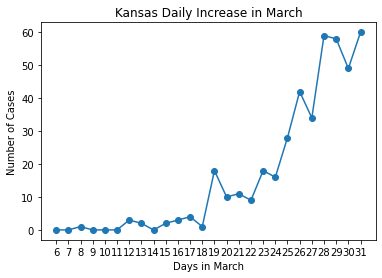

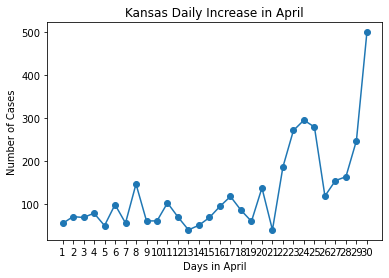

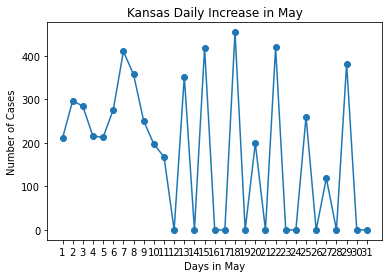

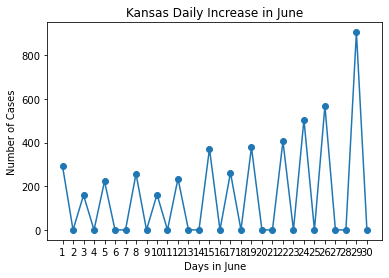

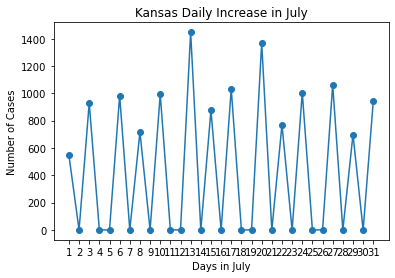

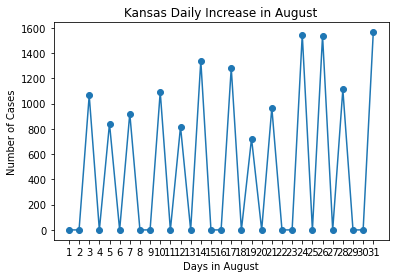

In [9]:
#Plot March data for Kansas
march_ks = plt.figure(1)
ks_date = np.arange(6,32)
ks_daily_march = ks_march["positiveIncrease"]

plt.plot(ks_date, ks_daily_march, marker = 'o')
plt.xticks(np.arange(min(ks_date), max(ks_date)+1, 1.0))
plt.xlabel("Days in March")
plt.ylabel("Number of Cases")
plt.title("Kansas Daily Increase in March")
plt.savefig("Images/Daily/ks_march_graph.png")

#Plot April data for Kansas
april_ks = plt.figure(2)
date = np.arange(1,31)
ks_daily_april = ks_april["positiveIncrease"]

plt.plot(date, ks_daily_april, marker = 'o')
plt.xticks(np.arange(min(date), max(date)+1, 1.0))
plt.xlabel("Days in April")
plt.ylabel("Number of Cases")
plt.title("Kansas Daily Increase in April")
plt.savefig("Images/Daily/ks_april_graph.png")

#Plot May data for Kansas
may_ks = plt.figure(3)
date = np.arange(1,32)
ks_daily_may = ks_may["positiveIncrease"]

plt.plot(date, ks_daily_may, marker = 'o')
plt.xticks(np.arange(min(date), max(date)+1, 1.0))
plt.xlabel("Days in May")
plt.ylabel("Number of Cases")
plt.title("Kansas Daily Increase in May")  
plt.savefig("Images/Daily/ks_may_graph.png")

#Plot June data for Kansas   
june_ks = plt.figure(4)
date = np.arange(1,31)
ks_daily_june = ks_june["positiveIncrease"]

plt.plot(date, ks_daily_june, marker = 'o')
plt.xticks(np.arange(min(date), max(date)+1, 1.0))
plt.xlabel("Days in June")
plt.ylabel("Number of Cases")
plt.title("Kansas Daily Increase in June")  
plt.savefig("Images/Daily/ks_june_graph.png")

#Plot July data for Kansas  
july_ks = plt.figure(5)
date = np.arange(1,32)
ks_daily_july = ks_july["positiveIncrease"]

plt.plot(date, ks_daily_july, marker = 'o')
plt.xticks(np.arange(min(date), max(date)+1, 1.0))
plt.xlabel("Days in July")
plt.ylabel("Number of Cases")
plt.title("Kansas Daily Increase in July")  
plt.savefig("Images/Daily/ks_july_graph.png")

#Plot August data for Kansas 
aug_ks = plt.figure(6)
date = np.arange(1,32)
ks_daily_aug = ks_aug["positiveIncrease"]

plt.plot(date, ks_daily_aug, marker = 'o')
plt.xticks(np.arange(min(date), max(date)+1, 1.0))
plt.xlabel("Days in August")
plt.ylabel("Number of Cases")
plt.title("Kansas Daily Increase in August")  
plt.savefig("Images/Daily/ks_aug_graph.png")

plt.show()

# Plot Daily Case Increase by Month for New Jersey

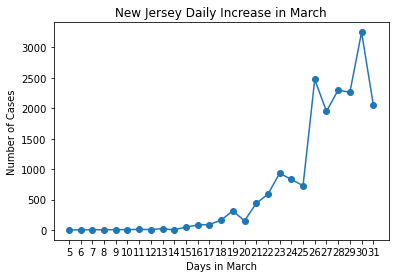

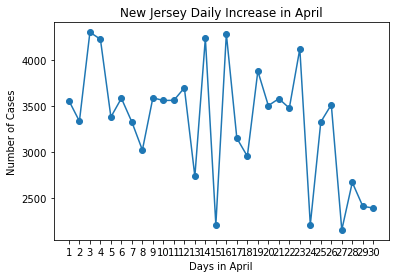

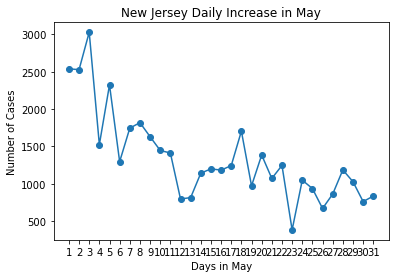

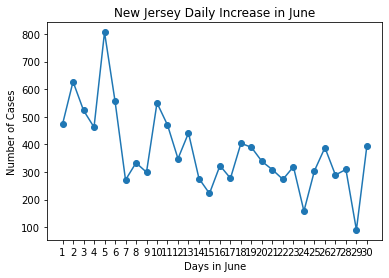

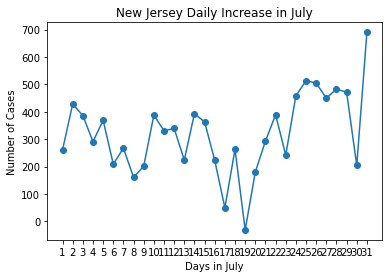

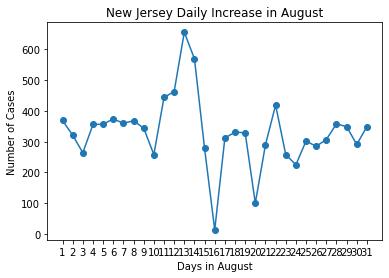

In [10]:
#Plot March data for New Jersey
march_nj = plt.figure(1)
nj_date = np.arange(5,32)
nj_daily_march = nj_march["positiveIncrease"]

plt.plot(nj_date, nj_daily_march, marker = 'o')
plt.xticks(np.arange(min(nj_date), max(nj_date)+1, 1.0))
plt.xlabel("Days in March")
plt.ylabel("Number of Cases")
plt.title("New Jersey Daily Increase in March")
plt.savefig("Images/Daily/nj_march_graph.png")

april_nj = plt.figure(2)
date = np.arange(1,31)
nj_daily_april = nj_april["positiveIncrease"]

plt.plot(date, nj_daily_april, marker = 'o')
plt.xticks(np.arange(min(date), max(date)+1, 1.0))
plt.xlabel("Days in April")
plt.ylabel("Number of Cases")
plt.title("New Jersey Daily Increase in April")
plt.savefig("Images/Daily/nj_april_graph.png")

#Plot May data for New Jersey   
may_nj = plt.figure(3)
date = np.arange(1,32)
nj_daily_may = nj_may["positiveIncrease"]

plt.plot(date, nj_daily_may, marker = 'o')
plt.xticks(np.arange(min(date), max(date)+1, 1.0))
plt.xlabel("Days in May")
plt.ylabel("Number of Cases")
plt.title("New Jersey Daily Increase in May")  
plt.savefig("Images/Daily/nj_may_graph.png")

#Plot June data for New Jersey   
june_nj = plt.figure(4)
date = np.arange(1,31)
nj_daily_june = nj_june["positiveIncrease"]

plt.plot(date, nj_daily_june, marker = 'o')
plt.xticks(np.arange(min(date), max(date)+1, 1.0))
plt.xlabel("Days in June")
plt.ylabel("Number of Cases")
plt.title("New Jersey Daily Increase in June")  
plt.savefig("Images/Daily/nj_june_graph.png")

#Plot July data for New Jersey   
july_nj = plt.figure(5)
date = np.arange(1,32)
nj_daily_july = nj_july["positiveIncrease"]

plt.plot(date, nj_daily_july, marker = 'o')
plt.xticks(np.arange(min(date), max(date)+1, 1.0))
plt.xlabel("Days in July")
plt.ylabel("Number of Cases")
plt.title("New Jersey Daily Increase in July")  
plt.savefig("Images/Daily/nj_july_graph.png")

#Plot August data for New Jersey   
aug_nj = plt.figure(6)
date = np.arange(1,32)
nj_daily_aug = nj_aug["positiveIncrease"]

plt.plot(date, nj_daily_aug, marker = 'o')
plt.xticks(np.arange(min(date), max(date)+1, 1.0))
plt.xlabel("Days in August")
plt.ylabel("Number of Cases")
plt.title("New Jersey Daily Increase in August")  
plt.savefig("Images/Daily/nj_aug_graph.png")

plt.show()

# Add Percent Daily Increase

In [60]:
#Add state population
ks_march["Population"] = "2913314"
ks_march["Population"] = pd.to_numeric(ks_march["Population"])
nj_march["Population"] = "8882190"
nj_march["Population"] = pd.to_numeric(nj_march["Population"])
#Add percent daily increase
ks_march["Pct of Daily Increase"] = ks_march["positiveIncrease"]/ks_march["Population"]
nj_march["Pct of Daily Increase"] = nj_march["positiveIncrease"]/nj_march["Population"]

#Format
# ks_march["Pct of Daily Increase"] = ks_march["Pct of Daily Increase"].astype(float).map("{:.2%}".format)
# nj_march["Pct of Daily Increase"] = nj_march["Pct of Daily Increase"].astype(float).map("{:.2%}".format)

In [61]:
#Add state population
ks_march["Population"] = "2913314"
ks_march["Population"] = pd.to_numeric(ks_march["Population"])
nj_march["Population"] = "8882190"
nj_march["Population"] = pd.to_numeric(nj_march["Population"])
#Add percent daily increase
ks_march["Pct of Daily Increase"] = ks_march["positiveIncrease"]/ks_march["Population"]
nj_march["Pct of Daily Increase"] = nj_march["positiveIncrease"]/nj_march["Population"]


#Sort by date
ks_march = ks_march.sort_values("date", ascending = True)
nj_march = nj_march.sort_values("date", ascending = True)

#Add state population
ks_april["Population"] = "2913314"
ks_april["Population"] = pd.to_numeric(ks_april["Population"])
nj_april["Population"] = "8882190"
nj_april["Population"] = pd.to_numeric(nj_april["Population"])
#Add percent daily increase
ks_april["Pct of Daily Increase"] = ks_april["positiveIncrease"]/ks_april["Population"]
nj_april["Pct of Daily Increase"] = nj_april["positiveIncrease"]/nj_april["Population"]


#Sort by date
ks_april = ks_april.sort_values("date", ascending = True)
nj_april = nj_april.sort_values("date", ascending = True)


#Add state population
ks_may["Population"] = "2913314"
ks_may["Population"] = pd.to_numeric(ks_may["Population"])
nj_may["Population"] = "8882190"
nj_may["Population"] = pd.to_numeric(nj_may["Population"])
#Add percent daily increase
ks_may["Pct of Daily Increase"] = ks_may["positiveIncrease"]/ks_may["Population"]
nj_may["Pct of Daily Increase"] = nj_may["positiveIncrease"]/nj_may["Population"]

#Sort by date
ks_may = ks_may.sort_values("date", ascending = True)
nj_may = nj_may.sort_values("date", ascending = True)


#Add state population
ks_june["Population"] = "2913314"
ks_june["Population"] = pd.to_numeric(ks_june["Population"])
nj_june["Population"] = "8882190"
nj_june["Population"] = pd.to_numeric(nj_june["Population"])
#Add percent daily increase
ks_june["Pct of Daily Increase"] = ks_june["positiveIncrease"]/ks_june["Population"]
nj_june["Pct of Daily Increase"] = nj_june["positiveIncrease"]/nj_june["Population"]


#Sort by date
ks_june = ks_june.sort_values("date", ascending = True)
nj_june = nj_june.sort_values("date", ascending = True)

#Add state population
ks_july["Population"] = "2913314"
ks_july["Population"] = pd.to_numeric(ks_july["Population"])
nj_july["Population"] = "8882190"
nj_july["Population"] = pd.to_numeric(nj_july["Population"])
#Add percent daily increase
ks_july["Pct of Daily Increase"] = ks_july["positiveIncrease"]/ks_july["Population"]
nj_july["Pct of Daily Increase"] = nj_july["positiveIncrease"]/nj_july["Population"]

#Sort by date
ks_july = ks_july.sort_values("date", ascending = True)
nj_july = nj_july.sort_values("date", ascending = True)


#Add state population
ks_aug["Population"] = "2913314"
ks_aug["Population"] = pd.to_numeric(ks_aug["Population"])
nj_aug["Population"] = "8882190"
nj_aug["Population"] = pd.to_numeric(nj_aug["Population"])
#Add percent daily increase
ks_aug["Pct of Daily Increase"] = ks_aug["positiveIncrease"]/ks_aug["Population"]
nj_aug["Pct of Daily Increase"] = nj_aug["positiveIncrease"]/nj_aug["Population"]

#Sort by date
ks_aug = ks_aug.sort_values("date", ascending = True)
nj_aug = nj_aug.sort_values("date", ascending = True)

# Plot Kansas and New Jersey Percentage Together

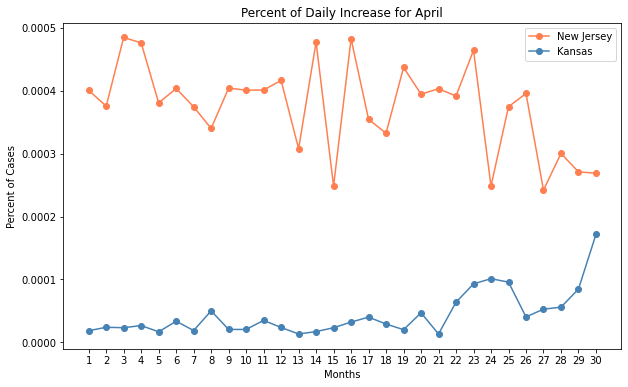

In [64]:
#Plot April
date = np.arange(1,31)

plt.figure(figsize = (10, 6))
ks_daily_pct_april, = plt.plot(date, ks_daily_april, marker = "o", color = "steelblue", label = "Kansas")
nj_daily_pct_april, = plt.plot(date, nj_daily_april, marker = "o", color = "coral", label = "New Jersey")
plt.xticks(np.arange(min(date), max(date)+1, 1.0))
plt.xlabel("Months")
plt.ylabel("Percent of Cases")
plt.title("Percent of Daily Increase for April")
plt.legend(handles=[nj_daily_pct_april, ks_daily_pct_april], loc = "best")
plt.savefig("Images/Percent/april.png")                            
plt.show()

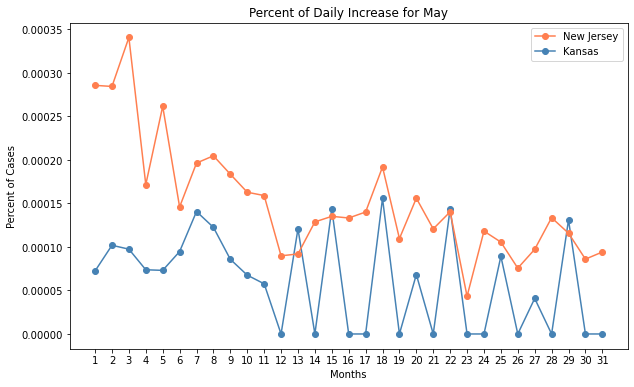

In [65]:
#Plot May
date = np.arange(1, 32)
plt.figure(figsize = (10, 6))
ks_daily_pct_may, = plt.plot(date, ks_daily_may, marker = "o", color = "steelblue", label = "Kansas")
nj_daily_pct_may, = plt.plot(date, nj_daily_may, marker = "o", color = "coral", label = "New Jersey")
plt.xticks(np.arange(min(date), max(date)+1, 1.0))
plt.xlabel("Months")
plt.ylabel("Percent of Cases")
plt.title("Percent of Daily Increase for May")
plt.legend(handles=[nj_daily_pct_may, ks_daily_pct_may], loc = "best")
plt.savefig("Images/Percent/may.png")                            
plt.show()

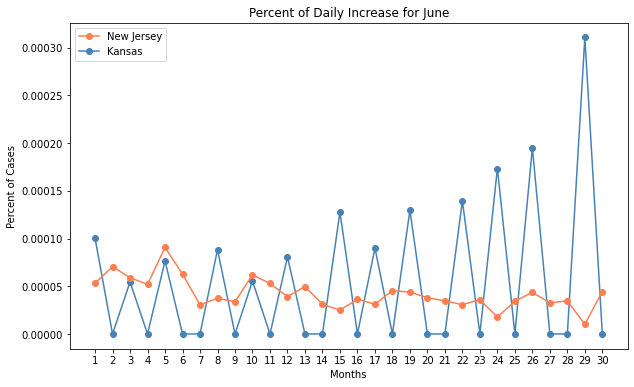

In [66]:
#Plot June
date = np.arange(1, 31)
plt.figure(figsize = (10, 6))
ks_daily_pct_june, = plt.plot(date, ks_daily_june, marker = "o", color = "steelblue", label = "Kansas")
nj_daily_pct_june, = plt.plot(date, nj_daily_june, marker = "o", color = "coral", label = "New Jersey")
plt.xticks(np.arange(min(date), max(date)+1, 1.0))
plt.xlabel("Months")
plt.ylabel("Percent of Cases")
plt.title("Percent of Daily Increase for June")
plt.legend(handles=[nj_daily_pct_june, ks_daily_pct_june], loc = "best")
plt.savefig("Images/Percent/june.png")                            
plt.show()

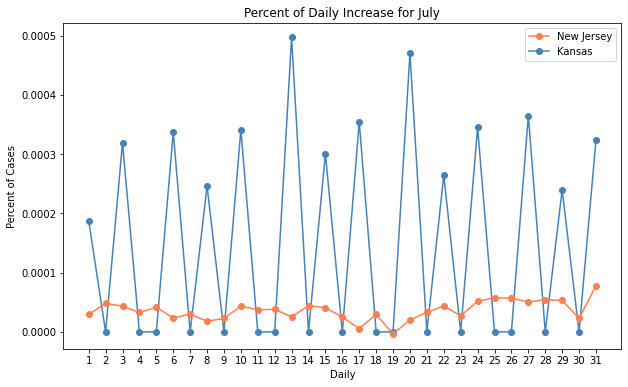

In [67]:
#Plot July
date = np.arange(1, 32)
plt.figure(figsize = (10, 6))
ks_daily_pct_july, = plt.plot(date, ks_daily_july, marker = "o", color = "steelblue", label = "Kansas")
nj_daily_pct_july, = plt.plot(date, nj_daily_july, marker = "o", color = "coral", label = "New Jersey")
plt.xticks(np.arange(min(date), max(date)+1, 1.0))
plt.xlabel("Daily")
plt.ylabel("Percent of Cases")
plt.title("Percent of Daily Increase for July")
plt.legend(handles=[nj_daily_pct_july, ks_daily_pct_july], loc = "best")
plt.savefig("Images/Percent/july.png")                            
plt.show()

In [68]:
#Plot March
mod_daily = pd.read_csv("Resources/ks_nj_daily_mod.csv")

#Format date
mod_daily["date"] = pd.to_datetime(mod_daily['date'], dayfirst = True)

#Filter for March data
ks_mod_march = pd.DataFrame(mod_daily.loc[(mod_daily["date"] >= "2020-03-01") & (mod_daily["date"] <= "2020-03-31") & (mod_daily["state"] == "KS") ,:])
nj_mod_march = pd.DataFrame(mod_daily.loc[(mod_daily["date"] >= "2020-03-01") & (mod_daily["date"] <= "2020-03-31") & (mod_daily["state"] == "NJ") ,:])
ks_mod_march = ks_mod_march.loc[(ks_mod_march["positive"] > 0),:]
nj_mod_march = nj_mod_march.loc[(nj_mod_march["positive"] > 0),:]
#Sort values
ks_mod_march = ks_mod_march.sort_values("date", ascending = True)
nj_mod_march = nj_mod_march.sort_values("date", ascending = True)

In [69]:
#Add state population
ks_mod_march["Population"] = "2913314"
ks_mod_march["Population"] = pd.to_numeric(ks_mod_march["Population"])
nj_mod_march["Population"] = "8882190"
nj_mod_march["Population"] = pd.to_numeric(nj_mod_march["Population"])


In [72]:
#Add percent daily increase
ks_mod_march["Pct of Daily Increase"] = ks_mod_march["positiveIncrease"]/ks_mod_march["Population"]
nj_mod_march["Pct of Daily Increase"] = nj_mod_march["positiveIncrease"]/nj_mod_march["Population"]

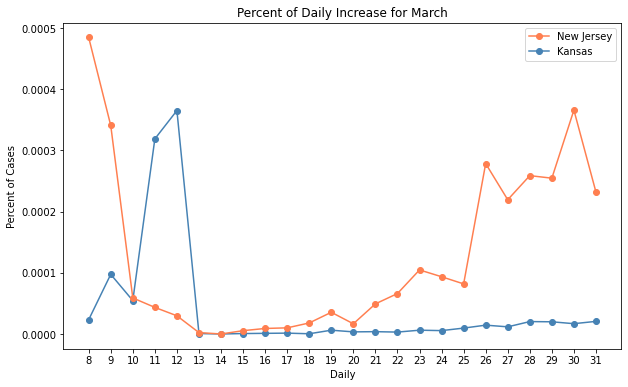

In [76]:
ks_mod_daily_march = ks_mod_march["Pct of Daily Increase"]
nj_mod_daily_march = nj_mod_march["Pct of Daily Increase"]
date = np.arange(8, 32)

plt.figure(figsize = (10, 6))
ks_mod_daily_march_plot, = plt.plot(date, ks_mod_daily_march, marker = "o", color = "steelblue", label = "Kansas")
nj_mod_daily_march_plot, = plt.plot(date, nj_mod_daily_march, marker = "o", color = "coral", label = "New Jersey")
plt.xticks(np.arange(min(date), max(date)+1, 1.0))
plt.xlabel("Daily")
plt.ylabel("Percent of Cases")
plt.title("Percent of Daily Increase for March")
plt.legend(handles=[nj_mod_daily_march_plot, ks_mod_daily_march_plot], loc = "best")
plt.savefig("Images/Percent/march.png")                            
plt.show()